#### Tips of using this notebook:

- Try to solve the problem yourself first with the help of ChatGPT.
- Then check the reference code and the example prompt. The example prompt will be given in the slides.
- Always check the reliability of the generated answers and be responsible for them.

# Exercise 1: KNN

Dataset: Glass Classification

Features: 
1. RI: refractive index;
2. Na: Sodium (unit measurement: weight percent in the corresponding oxide, as are features 3-9)
3. Mg: Magnesium
4. Al: Aluminum
5. Si: Silicon
6. K: Potassium
7. Ca: Calcium
8. Ba: Barium
9. Fe: Iron

Response: Glass types (discrete 7 values)
1. building_windows_float_processed
2. building_windows_non_float_processed
3. vehicle_windows_float_processed
4. vehicle_windows_non_float_processed (none in this database)
5. Containers
6. Tableware
7. headlamps

Tasks:
1. Feature Selection
    - Utilize a correlation matrix to identify and eliminate features that either do not significantly influence the output or are highly correlated with other features. 
    - This step helps to reduce redundancy in the data and can improve model performance.
2. Feature Scaling
    - Implement feature scaling to ensure all data is on a similar scale. 
    - This is particularly important for distance-based algorithms, as it prevents features with larger magnitudes from dominating the model due to their larger numerical values.
3. Parameter Tuning
    - Execute the K-Nearest Neighbors (KNN) algorithm with varying parameters, such as different values of K (the number of neighbors) and various distance metrics (e.g., Euclidean, Manhattan). 
    - This can help identify the optimal parameters that yield the best model performance.

Your answer here (the prompt and the code):

Reference code (Check the sildes for example prompt):

**Task 1: Feature Selection** 

Utilize a correlation matrix to identify and eliminate features that either do not significantly influence the output or are highly correlated with other features.

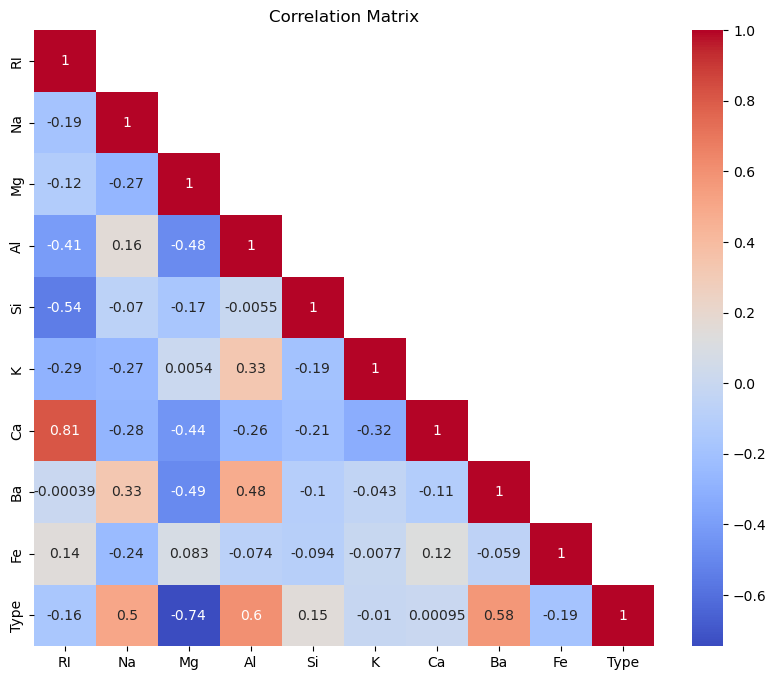

{'Na', 'Type', 'Si', 'Al', 'Fe', 'RI', 'Ba', 'Mg'}


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Read the dataset
dataset = pd.read_csv("glass.csv")

# Step 2: Compute correlation matrix
correlation_matrix = dataset.corr()

# Step 3: Visualize correlation matrix
plt.figure(figsize=(10, 8))

# Getting the Upper Triangle of the correlation matrix as mask 
triu = np.triu(correlation_matrix, k=1)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", mask=triu)
plt.title("Correlation Matrix")
plt.show()

# Step 4: Remove features with low correlation to the output
output_correlation_threshold = 0.1  # Adjust this threshold as needed
low_correlation_features = correlation_matrix[abs(correlation_matrix["Type"]) < output_correlation_threshold].index
dataset.drop(columns=low_correlation_features, inplace=True)

# Step 5: Remove highly correlated features
highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:  # Adjust this threshold as needed
            feature_i = correlation_matrix.columns[i]
            feature_j = correlation_matrix.columns[j]
            highly_correlated_features.add(feature_i)  # Remove feature_i

highly_correlated_features = highly_correlated_features & set(dataset.columns)
dataset.drop(columns=highly_correlated_features, inplace=True)

# Display the modified dataset after dropping the unwanted features
print(set(dataset.columns))

In [2]:
dataset

,RI,Na,Mg,Al,Si,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.00,0.0,1
...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,1.57,0.0,7


Task 2: **Feature Scaling** 

Implement feature scaling to ensure all data is on a similar scale.

In [3]:
# Step 6: Implement feature scaling
from sklearn.preprocessing import MinMaxScaler

# Exclude the output column from feature scaling
columns_to_scale = [col for col in dataset.columns if col != "Type"]

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the data
dataset[columns_to_scale] = scaler.fit_transform(dataset[columns_to_scale])

# Display the modified dataset after feature scaling
print(dataset)

           RI        Na        Mg        Al        Si        Ba   Fe  Type
0    0.432836  0.437594  1.000000  0.252336  0.351786  0.000000  0.0     1
1    0.283582  0.475188  0.801782  0.333333  0.521429  0.000000  0.0     1
2    0.220808  0.421053  0.790646  0.389408  0.567857  0.000000  0.0     1
3    0.285777  0.372932  0.821826  0.311526  0.500000  0.000000  0.0     1
4    0.275241  0.381955  0.806236  0.295950  0.583929  0.000000  0.0     1
..        ...       ...       ...       ...       ...       ...  ...   ...
209  0.223003  0.512782  0.000000  0.806854  0.500000  0.336508  0.0     7
210  0.250219  0.630075  0.000000  0.529595  0.580357  0.504762  0.0     7
211  0.417032  0.545865  0.000000  0.538941  0.644643  0.520635  0.0     7
212  0.235294  0.548872  0.000000  0.514019  0.678571  0.498413  0.0     7
213  0.261633  0.526316  0.000000  0.557632  0.633929  0.530159  0.0     7

[214 rows x 8 columns]


In [4]:
dataset

,RI,Na,Mg,Al,Si,Ba,Fe,Type
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.000000,0.0,1
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.000000,0.0,1
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.000000,0.0,1
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.000000,0.0,1
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.000000,0.0,1
...,...,...,...,...,...,...,...,...
209,0.223003,0.512782,0.000000,0.806854,0.500000,0.336508,0.0,7
210,0.250219,0.630075,0.000000,0.529595,0.580357,0.504762,0.0,7
211,0.417032,0.545865,0.000000,0.538941,0.644643,0.520635,0.0,7
212,0.235294,0.548872,0.000000,0.514019,0.678571,0.498413,0.0,7


Task 3: **Parameter Tuning**

Execute the K-Nearest Neighbors (KNN) algorithm with varying parameters, such as different values of K (the number of neighbors) and various distance metrics (e.g., Euclidean, Manhattan).

In [5]:
import warnings
warnings.filterwarnings("ignore",category=FutureWarning,module="sklearn")

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Step 7: Split the dataset into input features (X) and output variable (y)
X = dataset.drop(columns=["Type"])
y = dataset["Type"]

# Step 8: Split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 9: Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 10],
    'metric': ['euclidean', 'manhattan']
}

# Step 10: Initialize the K-Nearest Neighbors classifier
knn = KNeighborsClassifier()

# Step 11: Perform grid search to find the best parameters
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Step 12: Make predictions on the test data using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Step 13: Evaluate the accuracy of the best model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy (Best Model): {:.2f}%".format(accuracy * 100))

# Step 14: Print the best parameters found by grid search
print("Best Parameters:", grid_search.best_params_)

Accuracy (Best Model): 72.09%
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3}


# Exercise 2: SVM

Dataset: MNIST
- A large database of handwritten digits
- Contains 60,000 training images and 10,000 testing images
- The size of each image is 28x28 pixel
- A subset of 5,000 digits is used in this exercise.

Tasks:
- Load the dataset and print some examples.
- Train SVM models on the dataset and utilize grid search to find the best parameters. Use the F-score as the metric.

The code to select the subset from the MNIST (Size:5000):

In [6]:
import gzip
import numpy as np

def load_mnist_images(filename):
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1, 28, 28)
    return data

def load_mnist_labels(filename):
    with gzip.open(filename, 'rb') as f:
        labels = np.frombuffer(f.read(), np.uint8, offset=8)
    return labels

# Load training data and labels
train_data = load_mnist_images('MNIST/train-images-idx3-ubyte.gz')
train_labels = load_mnist_labels('MNIST/train-labels-idx1-ubyte.gz')

# Select 5000 examples from the training dataset
subset_size = 5000
np.random.seed(0)
subset_indices = np.random.choice(len(train_data), subset_size, replace=False)
subset_data = train_data[subset_indices]
subset_labels = train_labels[subset_indices]

Your answer here (the prompt and the code):

Reference code (Check the sildes for example prompt):

**Show some examples**

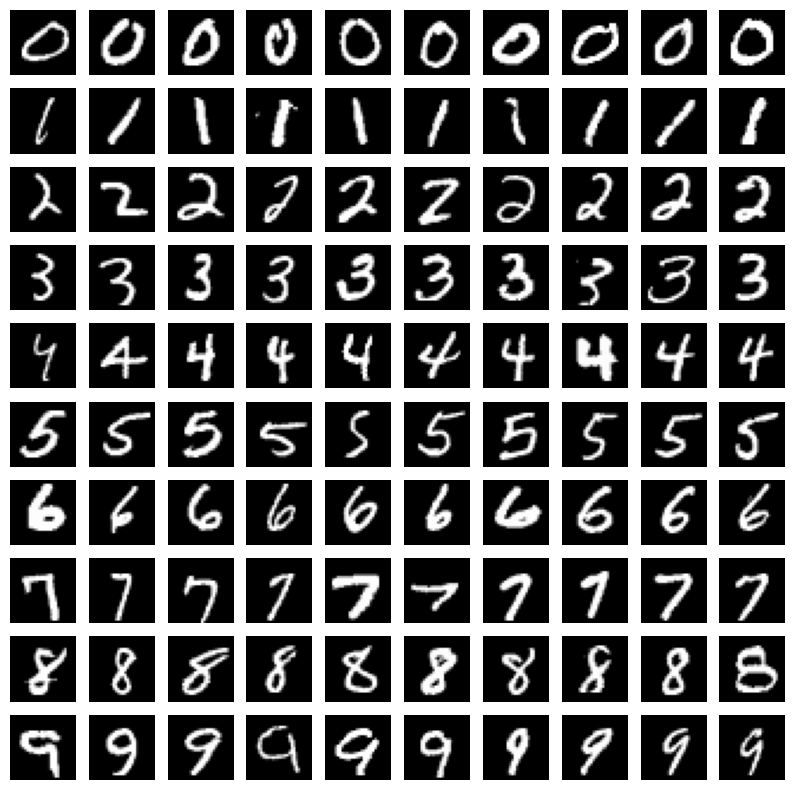

In [7]:
import matplotlib.pyplot as plt

# Initialize a list to store the indices of each class
class_indices = [[] for _ in range(10)]

# Iterate through the subset labels and store the indices of each class
for i, label in enumerate(subset_labels):
    class_indices[label].append(i)

# Plot 10 examples from each class
fig, axs = plt.subplots(10, 10, figsize=(10, 10))
for i in range(10):
    for j in range(10):
        index = class_indices[i][j]
        axs[i, j].imshow(subset_data[index], cmap='gray')
        axs[i, j].axis('off')
plt.show()

**Model training**

It might take a few minutes.

In [8]:
from sklearn.model_selection import train_test_split

# Split subset into training and testing datasets
train_data, test_data, train_labels, test_labels = train_test_split(subset_data, subset_labels, test_size=0.2, random_state=0)

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

# Define the parameter grid for grid search
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': [0.01, 0.1, 1]}

# Initialize the SVM classifier
svm = SVC()

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm, param_grid, scoring='f1_macro', cv=5)
grid_search.fit(train_data.reshape(len(train_data), -1), train_labels)

# Get the best SVM model
best_svm = grid_search.best_estimator_

# Print the best parameters and F-score
print("Best Parameters:", grid_search.best_params_)
print("Best F-Score:", grid_search.best_score_)

Best Parameters: {'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}
Best F-Score: 0.9067932193247946


**Model Testing**

In [9]:
# Predict labels for the test dataset
test_predictions = best_svm.predict(test_data.reshape(len(test_data), -1))

# Calculate accuracy and F-score
accuracy = np.mean(test_predictions == test_labels)
f_score = f1_score(test_labels, test_predictions, average='macro')

# Print accuracy and F-score
print("Accuracy:", accuracy)
print("F-Score:", f_score)

Accuracy: 0.9
F-Score: 0.8968284414204678


## Template for Assignment 5 submission

```
import pandas as pd
import os

def read_data_from_csv(path):
    """Load datasets from CSV files.
    Args:
        path (str): Path to the CSV file.
    Returns:
        X (np.ndarray): Features of samples.
        y (np.ndarray): Labels of samples, only provided in the public datasets.
    """
    assert os.path.exists(path), f'File not found: {path}!'
    assert os.path.splitext(path)[
        -1] == '.csv', f'Unsupported file type {os.path.splitext(path)[-1]}!'

    data = pd.read_csv(path)
    column_list = data.columns.values.tolist()

    if 'Label' in column_list:
        # for the public dataset, label column is provided.
        column_list.remove('Label')
        X = data[column_list].values
        y = data['Label'].astype('int').values
        return X, y
    else:
        # for the private dataset, label column is not provided.
        X = data[column_list].values
        return X
    

X_public, y_public = read_data_from_csv('assignment_5_public.csv')
print('Shape of X_public:', X_public.shape)  # n_sample, m_feature (30000, 58)
print('Shape of y_public:', y_public.shape)  # n_sample (30000,)

'''
CODE HERE!
'''

X_private = read_data_from_csv('assignment_5_private.csv')
print('Shape of X_private:', X_private.shape)  # k_sample, m_feature (5000, 58)

import numpy as np

# remove and make your own predictions.
preds = np.full(len(X_private), -1,
                dtype=int)
'''
CODE HERE!
e.g.,
preds = np.full(len(X_private), -1, dtype=int)
'''

submission = pd.DataFrame({'Label': preds})
submission.to_csv('assignment_5.csv', index=True, index_label='Id')
```